In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,  func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
# Reflect Database into ORM classes
# reflect the tables 
Base = automap_base()
Base.prepare(engine, reflect=True)




In [6]:
# look at the keys in the table 
Base.classes.keys()

['measurement', 'station']

In [7]:
# save a reference for each table 
station = Base.classes.station

measurement = Base.classes.measurement 

In [8]:
# create a database session object 
session = Session(engine)

In [9]:
# View all of the classes that automap found
session.query(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [10]:
# View all of the classes that automap found
session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).all()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
# order by in descending order if not you will get it an ascending and it will return the oldest date 
last_measurement = session.query(measurement.date).order_by(measurement.date.desc()).first().date
print(last_measurement)




2017-08-23


In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# engine to run with sql syntax 
# list of Tuples 
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


# Starting from the most recent data point in the database. 

last_measurement = session.query(measurement.date).order_by(measurement.date.desc()).first().date
print(last_measurement)

# Calculate the date one year from the last date in data set.
#strptime() function needed see python docs .date docs
#strftime() function needed see python docs .date docs
#timedelta() function needed see python docs .date docs

last_date = dt.datetime.strptime(last_measurement, "%Y-%m-%d").date()
start = last_date - dt.timedelta(days=365)
start_date = start.strftime("%Y-%m-%d")

results = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date.between(start_date,last_date)).all()
session.close()


           
# # Save the query results saved in the lists above as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(results, columns = ['Dates', 'Prcp'])



# Sort the dataframe by date 
# clean data 
# set index based off the dates 

df_drop = df.dropna()
df_measurement = df_drop.sort_values('Dates').set_index('Dates')
df_measurement 



2017-08-23


Prcp
Dates           
2016-08-23  0.00
2016-08-23  0.02
2016-08-23  0.05
2016-08-23  0.70
2016-08-23  0.15
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.00
2017-08-23  0.45

[2021 rows x 1 columns]

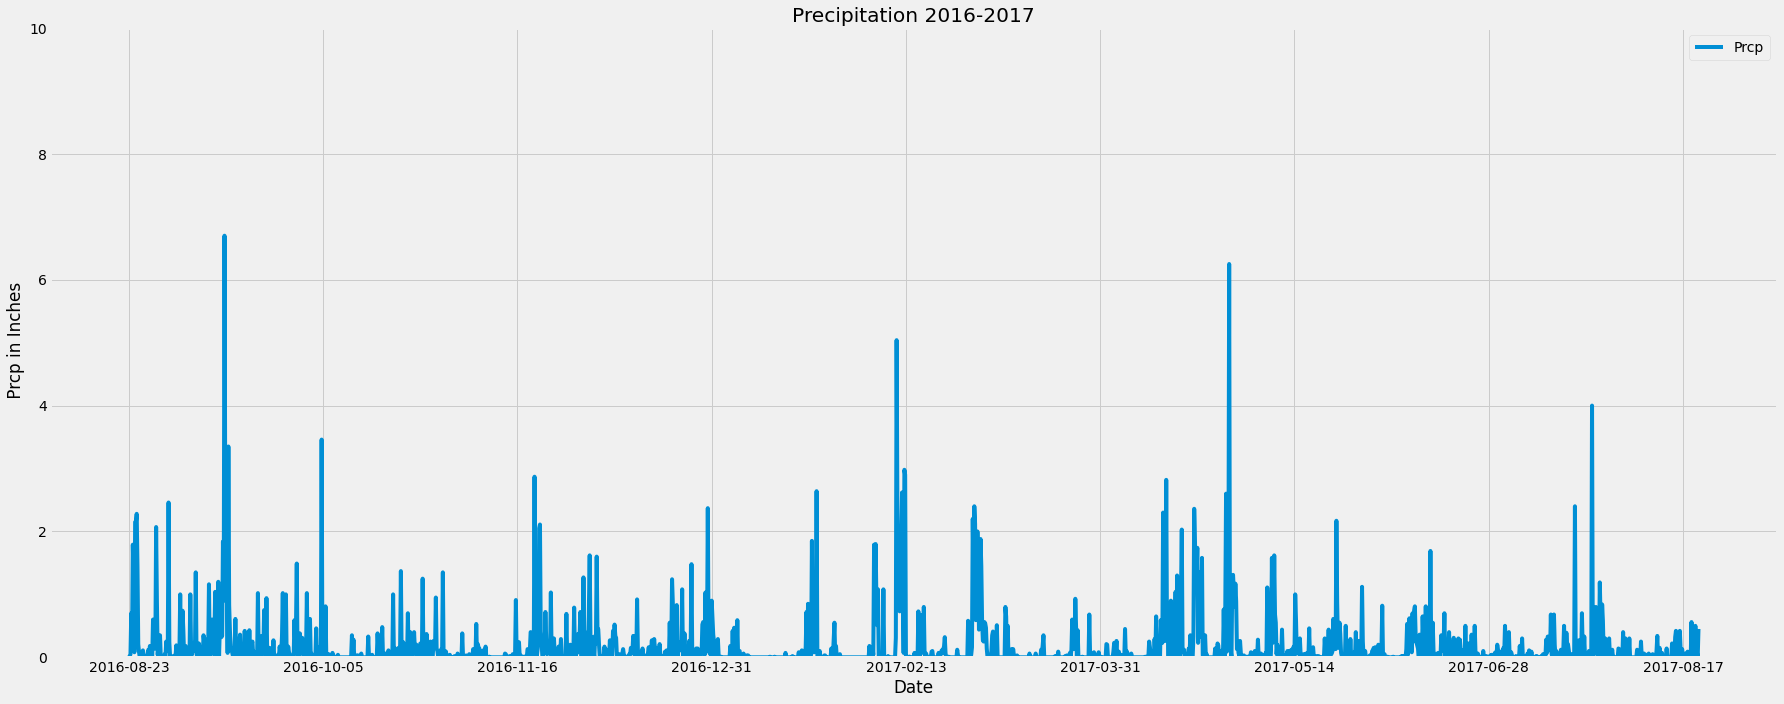

In [17]:
#Use Pandas Plotting with Matplotlib to plot the data
measurement_plot = df_measurement.plot(figsize=(25,10), ylim=(0,10),
                                       title = "Precipitation 2016-2017",
                                       xlabel = "Date",
                                       ylabel = " Prcp in Inches")

plt.tight_layout()
plt.savefig("Images/prcp_bar.png")
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_measurement.describe()

Prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Exploratory Station Analysis

In [19]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])
    
# Design a query to calculate the total number stations in the dataset
count = session.query(func.count(station.id)).all()
print(count)


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
[(9,)]


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station_query = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

active_station_query


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#USC00519281, 2772 == active_station_query[0][0]

# create variables using max, min, avg fuctions refer to sqlalchemy basic functions documentation 
max = func.max(measurement.tobs)
min = func.min(measurement.tobs)
avg = func.avg(measurement.tobs)

query_station = session.query(measurement.station, max, min, avg)\
    .filter(measurement.date.between(start_date,last_date))\
    .order_by(measurement.station==active_station_query[0][0]).all()
    
query_station

[('USC00516128', 87.0, 58.0, 74.59058295964125)]

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_year = session.query(measurement.tobs, measurement.station)\
    .filter(measurement.date.between(start_date,last_date))\
    .order_by(measurement.date.desc())\
    .filter(measurement.station==active_station_query[0][0]).all()
    
#save the query to a data

station_df = pd.DataFrame(station_year, columns = ['Obs', 'Temp'])
station_df



Obs         Temp
0    79.0  USC00519281
1    76.0  USC00519281
2    76.0  USC00519281
3    77.0  USC00519281
4    77.0  USC00519281
..    ...          ...
347  75.0  USC00519281
348  80.0  USC00519281
349  80.0  USC00519281
350  77.0  USC00519281
351  77.0  USC00519281

[352 rows x 2 columns]

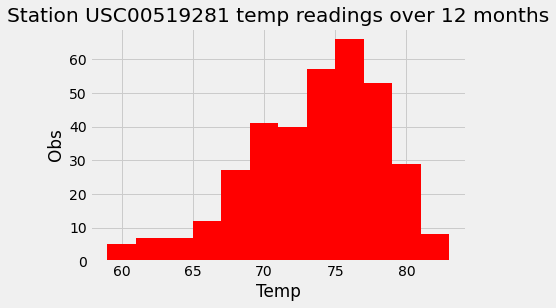

In [23]:
# Plot the results as a histogram with `bins=12`

station_df['Obs'].hist(bins=12, color='red')
plt.title("Station USC00519281 temp readings over 12 months")
plt.xlabel('Temp')
plt.ylabel('Obs')
plt.savefig('Images/histogram_tobs.png')
plt.show()

# Close session

In [24]:
# Close Session
session.close()